# **Multiclass dog breed classification**

This notebook builds an end-to-end image classifier using TensorFlow and TensorFlow Hub.

## 1. Problem

Creating a machine learning model that recognizes and classifies dog breeds given an image of a dog.

## 2. Data

The data comes frome Kaggle's 'Dog Breed Identification' competition: https://www.kaggle.com/competitions/dog-breed-identification/data.

It consists of a training set (10222 samples with labels) and a test set (10.4k samples) of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs.

## 3. Evaluation

Model performance is evaluated through a file that contains the predicted classification probability of each sample.

## Workspace preparation

In [1]:
#importing the necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting the data ready

In [2]:
#Importing the csv file that contains the labels of the samples in the training set
labels_csv = pd.read_csv('/content/drive/MyDrive/Dog breed classification project/labels.csv')
print(labels_csv.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [3]:
#we have 120 breeds and 10222 unique samples
print(labels_csv.describe())
#We have no missing data
print(labels_csv.info())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB
None


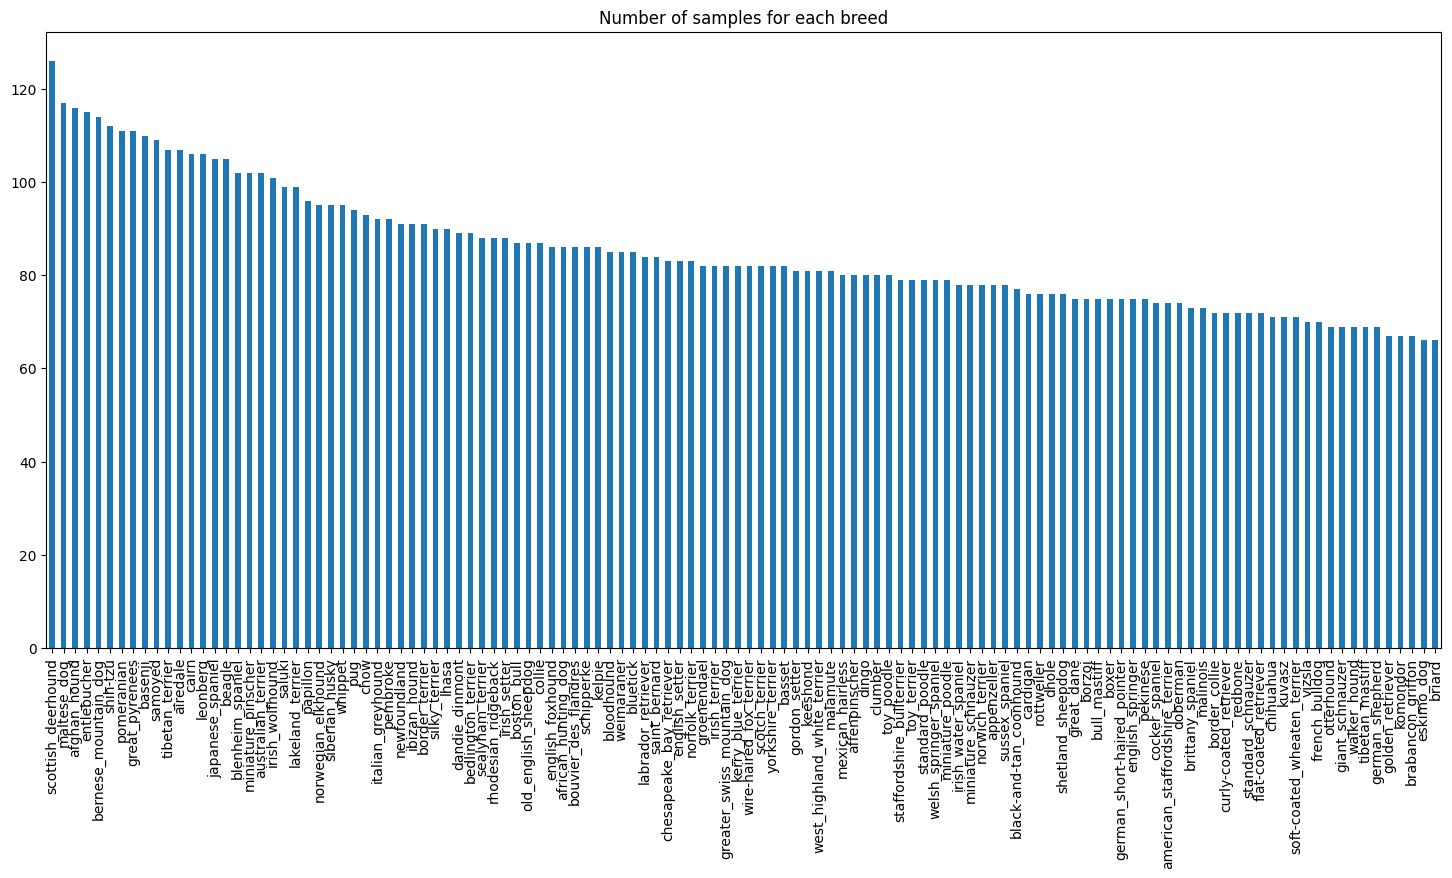

In [4]:
#Number of samples of each breed
labels_csv['breed'].value_counts().plot(kind='bar', figsize=(18,8))
plt.title("Number of samples for each breed");

In [5]:
#Median number of samples per breed
labels_csv['breed'].value_counts().median()

82.0

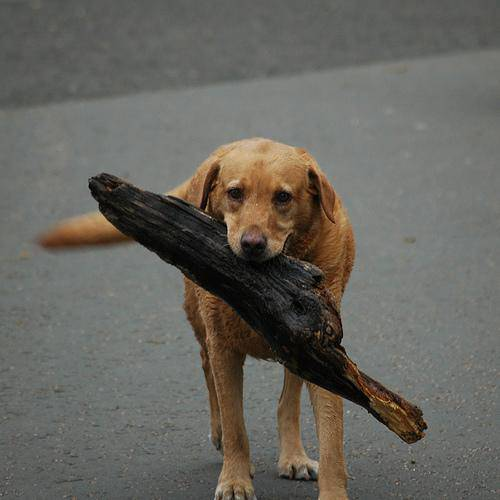

In [6]:
#Visualizing one of the sample images
from IPython.display import Image
Image('/content/drive/MyDrive/Dog breed classification project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg')

In [7]:
#Creating a list of the paths to each of the images
filenames = ['/content/drive/MyDrive/Dog breed classification project/train/' + names for names in labels_csv['id'] +'.jpg']
#Fisrt 5 elements of the list
filenames[:5]

['/content/drive/MyDrive/Dog breed classification project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog breed classification project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog breed classification project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog breed classification project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog breed classification project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [8]:
#Verifying that the number of samples in the train folder are the same as in labels_csv
import os
len(os.listdir('/content/drive/MyDrive/Dog breed classification project/train')) == len(labels_csv)

True

## Preparing the labels

In [9]:
#turning the labels into an array
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [10]:
#Find the unique label values
unique_breeds = np.unique(labels)

In [11]:
#Turn every label into a boolean array
boolean_array = np.array([label == unique_breeds for label in labels])
boolean_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
boolean_array.shape

(10222, 120)

In [13]:
print(labels[0])
#code to find the index where a label is found in unique_labels
print(np.where(labels[0]==unique_breeds))
#Index where label occurs in boolean_array
print(boolean_array[0].argmax())
#How to one hot encode a boolean_array
boolean_array[0].astype(int)

boston_bull
(array([19]),)
19


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
encoded_labels = boolean_array.astype(int)
encoded_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Setting up the training and validation sets

In [15]:
X = filenames
y = encoded_labels

We'll start with 1000 images and then take them all once we have evaluated model performance

In [16]:
#Set the number of images for experimenting
NUM_IMAGES = 1000 # @param {type:"slider", min:1000, max:10000, step:1000}

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=1)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

## Preprocessing images: turning images into tensors

We will create a function that:
1. Takes an image filepath as input.
2. Uses tensorflow to read the file and save it as a variable.
3. Turns the image (jpeg) into tensors.
4. Normalizes the image.
5. Resizes the image to a shape of (224,224). This is because the transfer learning model was trained with that shape.
6. Return the modified image.  

In [18]:
#Converting an image to a numpy array
image = plt.imread(filenames[4])
image.shape

(500, 500, 3)

In [19]:
#an image consists of red green and blue values between 0 and 225 for pixels
image.max(), image.min()

(225, 0)

In [20]:
#Transforming the image into a tensor
t_image = tf.constant(image)
t_image[0]

<tf.Tensor: shape=(500, 3), dtype=uint8, numpy=
array([[85, 87, 84],
       [85, 87, 84],
       [85, 87, 84],
       ...,
       [78, 84, 80],
       [78, 84, 80],
       [78, 84, 80]], dtype=uint8)>

### Preprocessing function

In [21]:
IMG_SIZE = 224
def preprocess_image(filepath, size=IMG_SIZE):

  #reading the image as a tensor of type "string"
  image = tf.io.read_file(filepath)
  #turn the jpeg image into tensors with three color channels (red, green, blue)
  image = tf.image.decode_jpeg(image,channels=3)
  #Normalizing the values
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resizing the image
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

In [22]:
#preprocess example
preprocess_image(filenames[1]).shape

TensorShape([224, 224, 3])

## Turning the data into batches

In [23]:
#Creating a function that returns a tuple of (preprocessed_image, label)
def get_image_label(filepath,label):
  image = preprocess_image(filepath)
  return image, label

In [24]:
#Defining the batch size
BATCH_SIZE = 32
#Create a function to create data into batches
def create_data_batches(X,y=None, batch_size= BATCH_SIZE, valid_data=False,test_data=False):
  '''
  Create batches of data out of image (X) and label (y) pairs.
  It shuffles the data if it is the training data, and doesn't shuffle if
  it's validation data. It also accepts test data as input (no labels).
  '''
  #If the data is the test dataset, we likely won't have labels:
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) #only filepaths, no labels
    data_batch = data.map(preprocess_image).batch(batch_size)
    print('batch created')
    return data_batch

  #If the data is a validation dataset, we don't need to shuffle it
  if valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepath
                                               tf.constant(y))) #labels
    #This time we use the get_image_label function because we are also working with labels
    data_batch = data.map(get_image_label).batch(batch_size)
    print('batch created')
    return data_batch

  else:
    print('Creating training data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    #shuffling the data before mapping
    #The shuffle is done before preprocessing because it is more computationally efficient this way
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(batch_size)
    print('batch created')
    return data_batch


In [25]:
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val, valid_data=True)

Creating training data batches...
batch created
Creating validation data batches...
batch created


In [26]:
#Now our data is in a dataset
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.int64, name=None))>

## Visualizing data batches

In [27]:
#Creating a function for viewing images in a data batch
def show_images(images, labels):
  '''
  Displays a plot of 25 images and their labels from a data batch
  '''
  #Setup the figure
  plt.figure(figsize=(12,12))
  #Loop through 25
  for i in range(25):
    #Create subplots
    ax = plt.subplot(5,5,i+1)
    #Display image
    plt.imshow(images[i])
    #Add the label as the image title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turning grid lines off
    plt.axis('off')

In [28]:
#Unbatching the images
train_images, train_labels = next(train_data.as_numpy_iterator()) #next takes the top batch of the iterator

In [29]:
len(train_images), len(train_labels)

(32, 32)

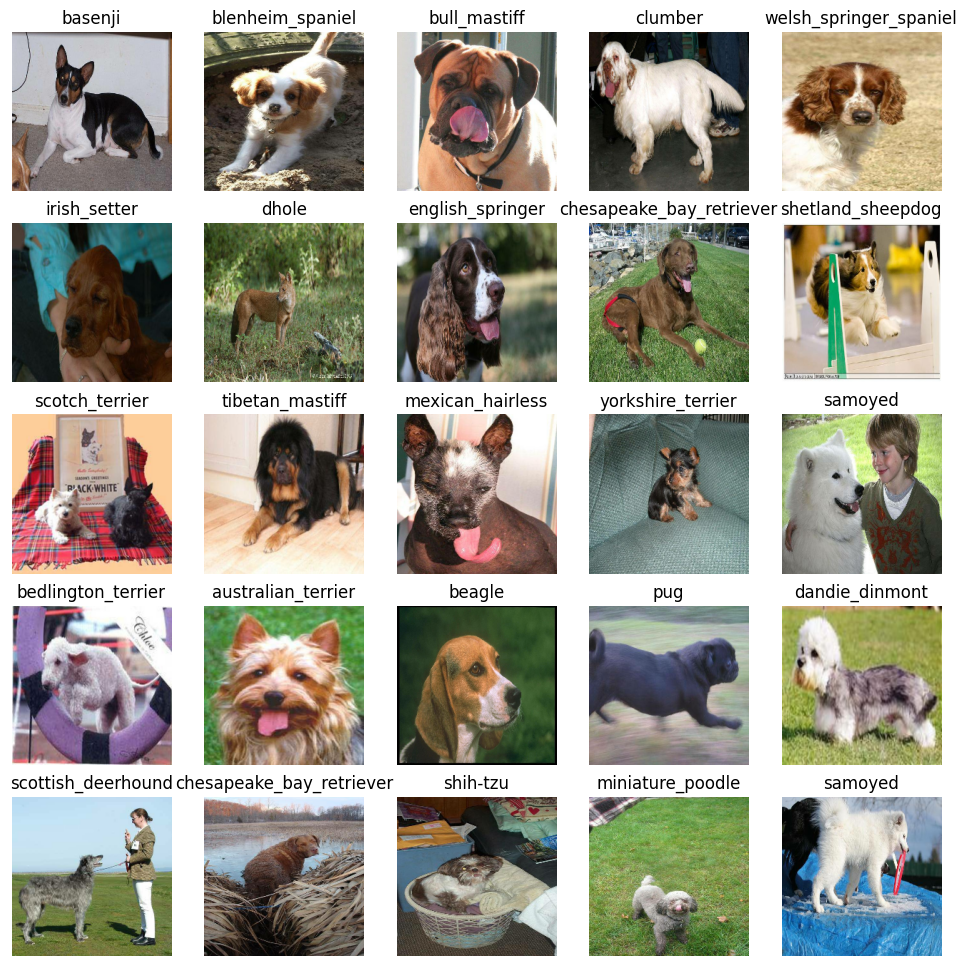

In [30]:
#Using the visualization function on the train dataset
show_images(train_images, train_labels)

## Bulding a model

Previous steps:
* The input shape (our images shape, in the form of Tensors) of our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [ ]:
IMG_SIZE

In [31]:
#Setting the input shape
INPUT_SHAPE = [None, IMG_SIZE,IMG_SIZE,3]
#Setting the output shape
OUTPUT_SHAPE = len(unique_breeds)
#Model URL
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/140-224-classification/versions/2"
#first one: "https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1"

Creating a function that:
* Takes the input and output shapes and the model as parameters.
* Defines the layers in a Keras model sequentially
* Compiles the model
* Builds the model
* Returns the model

Documentation: https://www.tensorflow.org/guide/keras

In [78]:
#Creating a function that creates a Keras model

def create_model(model_url=MODEL_URL, input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE):

  #Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url), #Input Layer
      tf.keras.layers.Dense(units=1000, activation ='relu'), #Hidden layer
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(units=output_shape,activation='softmax') #Output layer
                              ])

  #Compiling the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics= ['accuracy']
  )
  #Building the model
  model.build(input_shape)

  return model

In [79]:
model = create_model()

In [80]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_9 (KerasLayer)  (None, 1001)              6158505   
                                                                 
 dense_23 (Dense)            (None, 1000)              1002000   
                                                                 
 dropout_14 (Dropout)        (None, 1000)              0         
                                                                 
 dense_24 (Dense)            (None, 120)               120120    
                                                                 
Total params: 7280625 (27.77 MB)
Trainable params: 1122120 (4.28 MB)
Non-trainable params: 6158505 (23.49 MB)
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions that a model uses during training to save/check its progress or stop training early if the model stops improving.

We'll create two callbacks, one for TensorBoard, which helps track our models progress, and another for early stopping, which prevents our model from training for too long.

### Tensorboard callback
three things are needed:
1. Load up the tensorboard notebook extension
2. Create a tensorboard callback that can save logs to a directory
3. Pass the tensorboard callback to the model's fit function
4. Visualize the model's training log with the %tensorbard magic *function*

In [ ]:
#Load tensorboard notebook
%load_ext tensorboard

In [82]:
import datetime

#Create a function to build a tensorboard callback
def create_tensorboard_callback():
  #Create a log directory for storing tensorboard logs
  logdir = os.path.join('/content/drive/MyDrive/Dog breed classification project/logs',
                        #make it so that the logs get tracked whenever we train the model
                        datetime.datetime.now().strftime("%d%m%Y-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir=logdir)

### Creating an early stopping callback

This callback stops the model from overfitting by stopping training if a certain evaluation metric stops improving.

In [83]:
#Creating an early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

## Training the model

The first model will only train on 1000 images to make sure that everything is working properly.

In [84]:
#Number of epochs
EPOCHS = 100 #@param {type:'slider', min:10, max:100, step:10}

In [85]:
#Checking to make sure the GPU is available
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Creating a function that trains the model

* Creates a model with the create_model function
* Creates a tensorboard callback with create_tensorboard_callback
* Calls the fit function of the model
* Returns the model

In [86]:
#Function to create, train, and return a trained model

def train_model():
  #Create model
  model = create_model()

  #Create a new tensorboard callback every time we train a model
  tensorboard = create_tensorboard_callback()

  #Train the model
  model.fit(x=train_data,
            epochs= EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks= [tensorboard,early_stopping])
  return model

In [87]:
#Fit model to the data
model = train_model()

Epoch 1/100
25/25 [==============================] - 11s 271ms/step - loss: 3.9699 - accuracy: 0.2175 - val_loss: 1.8878 - val_accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 4s 164ms/step - loss: 0.5669 - accuracy: 0.8600 - val_loss: 1.0569 - val_accuracy: 0.7050
Epoch 3/100
25/25 [==============================] - 4s 140ms/step - loss: 0.1560 - accuracy: 0.9688 - val_loss: 0.9568 - val_accuracy: 0.7400
Epoch 4/100
25/25 [==============================] - 4s 147ms/step - loss: 0.0792 - accuracy: 0.9900 - val_loss: 0.9793 - val_accuracy: 0.7300
Epoch 5/100
25/25 [==============================] - 4s 162ms/step - loss: 0.0585 - accuracy: 0.9937 - val_loss: 0.9415 - val_accuracy: 0.7350


## Making and evaluating predictions with a trained model

In [88]:
predictions = model.predict(val_data, verbose=1)

7/7 [==============================] - 2s 164ms/step


In [90]:
#Each prediction is array with 120 values, one for the probability of each class
predictions[0]

array([3.4440545e-05, 7.5426315e-06, 1.8623346e-05, 6.9374400e-06,
       1.3676821e-06, 5.7910202e-05, 1.2653117e-04, 1.2925142e-04,
       4.5034363e-07, 1.3099705e-06, 2.2761694e-06, 4.3513352e-05,
       9.2351438e-06, 1.3502304e-06, 1.6670283e-05, 7.1791965e-07,
       5.0539256e-04, 1.3976817e-05, 4.1611587e-05, 8.3828318e-06,
       1.0193916e-05, 2.8929569e-06, 6.8208246e-06, 1.0817198e-05,
       4.5262755e-06, 7.8969169e-06, 1.2041539e-04, 1.7513510e-05,
       2.0031101e-05, 2.1450012e-06, 2.2700390e-04, 7.5414113e-07,
       5.4690298e-07, 1.4460897e-03, 1.9052753e-05, 1.2167549e-06,
       8.7480417e-05, 7.2301546e-04, 3.9235883e-06, 9.2896889e-06,
       8.4288581e-07, 2.4770459e-06, 7.7900683e-07, 5.3580934e-06,
       3.6145552e-04, 4.3417117e-06, 5.3514348e-04, 4.5786082e-06,
       2.3875433e-05, 1.4311208e-06, 1.4878279e-06, 2.2275256e-06,
       3.6447616e-07, 9.4380594e-06, 9.4051170e-01, 1.7391378e-05,
       1.3702664e-05, 6.8173904e-08, 1.8555340e-05, 2.3821221e

In [94]:
#Function for getting the labels out of a prediction
def get_prediction_label(prediction):
  '''
  Turns an array of prediction probabilities into a label
  '''
  return unique_breeds[np.argmax(prediction)]

#example
get_prediction_label(predictions[0])

'groenendael'

In [95]:
#Create a function to unbatch a batched dataset
def unbatch_dataset(dataset):
  '''
 Takes a batched data set, unbatches it,
 and returns lists of the images and labels
 '''
  ub_images = []
  ub_labels = []
  for image, label in dataset.unbatch().as_numpy_iterator():
    ub_images.append(image)
    ub_labels.append(label)
  return ub_images, ub_labels

In [96]:
val_images, val_labels = unbatch_dataset(val_data)

We'll create a function that plots the predicted label, its predicted probability, and the target image on a single plot.

In [101]:
def plot_prediction(pred_prob, true_label, image, n=0):

  #pred label
  pred_label = get_prediction_label(pred_prob[n])
  actual_label = unique_breeds[true_label[n].argmax()]

  #Color title depending on prediction correctness
  if pred_label == actual_label:
    color = 'green'
  else:
    color = 'red'

  #plot image and remove image
  plt.imshow(image[n])
  plt.xticks([])
  plt.yticks([])
  plt.title(f"True breed: {actual_label},  predicted breed: {pred_label},  probability: {np.max(pred_prob[n])*100:.2f}%", color=color, fontsize=10)


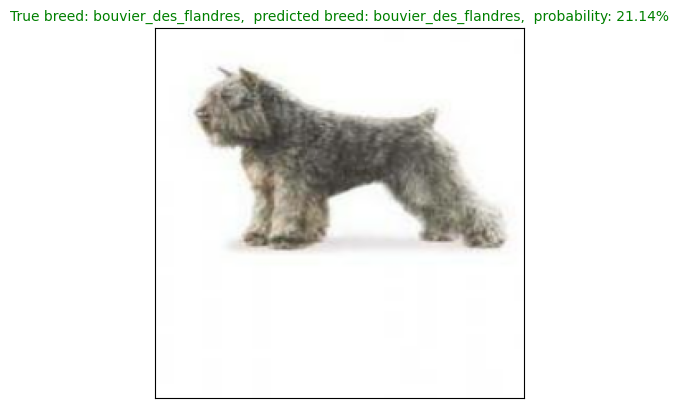

In [102]:
#The prediction is correct, even though the probability is low
#This means the model is not too sure
plot_prediction(predictions,val_labels, val_images, n=1)

In [110]:
#Creating a function that plots the top ten prediction confidences for a single prediction
def plot_pred_conf(predictions, labels, n=1):
  pred_prob, true_label = predictions[n], labels[n]

  #The predicted label
  pred_label = get_prediction_label(pred_prob)

  #top ten prediction confidence indexes
  top_ten_indexes = pred_prob.argsort()[-10:][::-1] #[-10:] gets the last ten and [::-1] orders them in descending order
  #top ten prediction confidence values
  top_ten_values = pred_prob[top_ten_indexes]
  #top ten prediction labels
  top_ten_labels = unique_breeds[top_ten_indexes]

  #setup plot
  top_plot = plt.bar(np.arange(len(top_ten_labels)),top_ten_values, color='grey')
  plt.xticks(np.arange(len(top_ten_labels)), labels=top_ten_labels, rotation='vertical')

  #Change the color of the true label
  if np.isin(unique_breeds[true_label.argmax()], top_ten_labels):
    top_plot[np.argmax(top_ten_labels == unique_breeds[true_label.argmax()])].set_color("green")
  else:
    pass

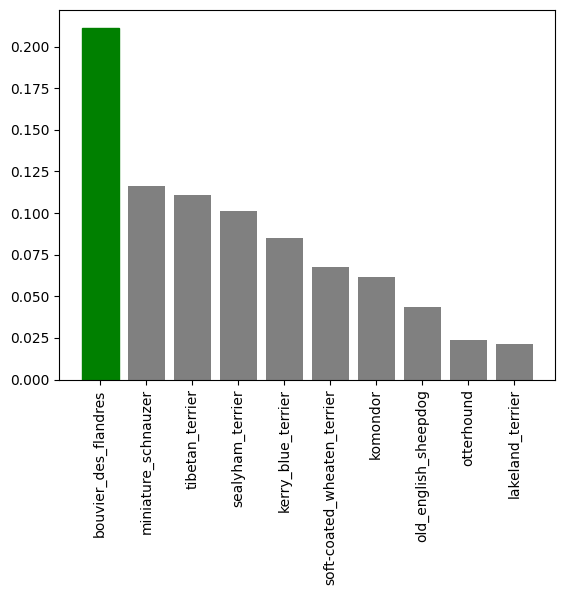

In [107]:
#Breed probability values for the previous image
plot_pred_conf(predictions, val_labels, n=1)

In [108]:
np.isin(5,np.array([0,1,2,3,4,5]))

array(True)

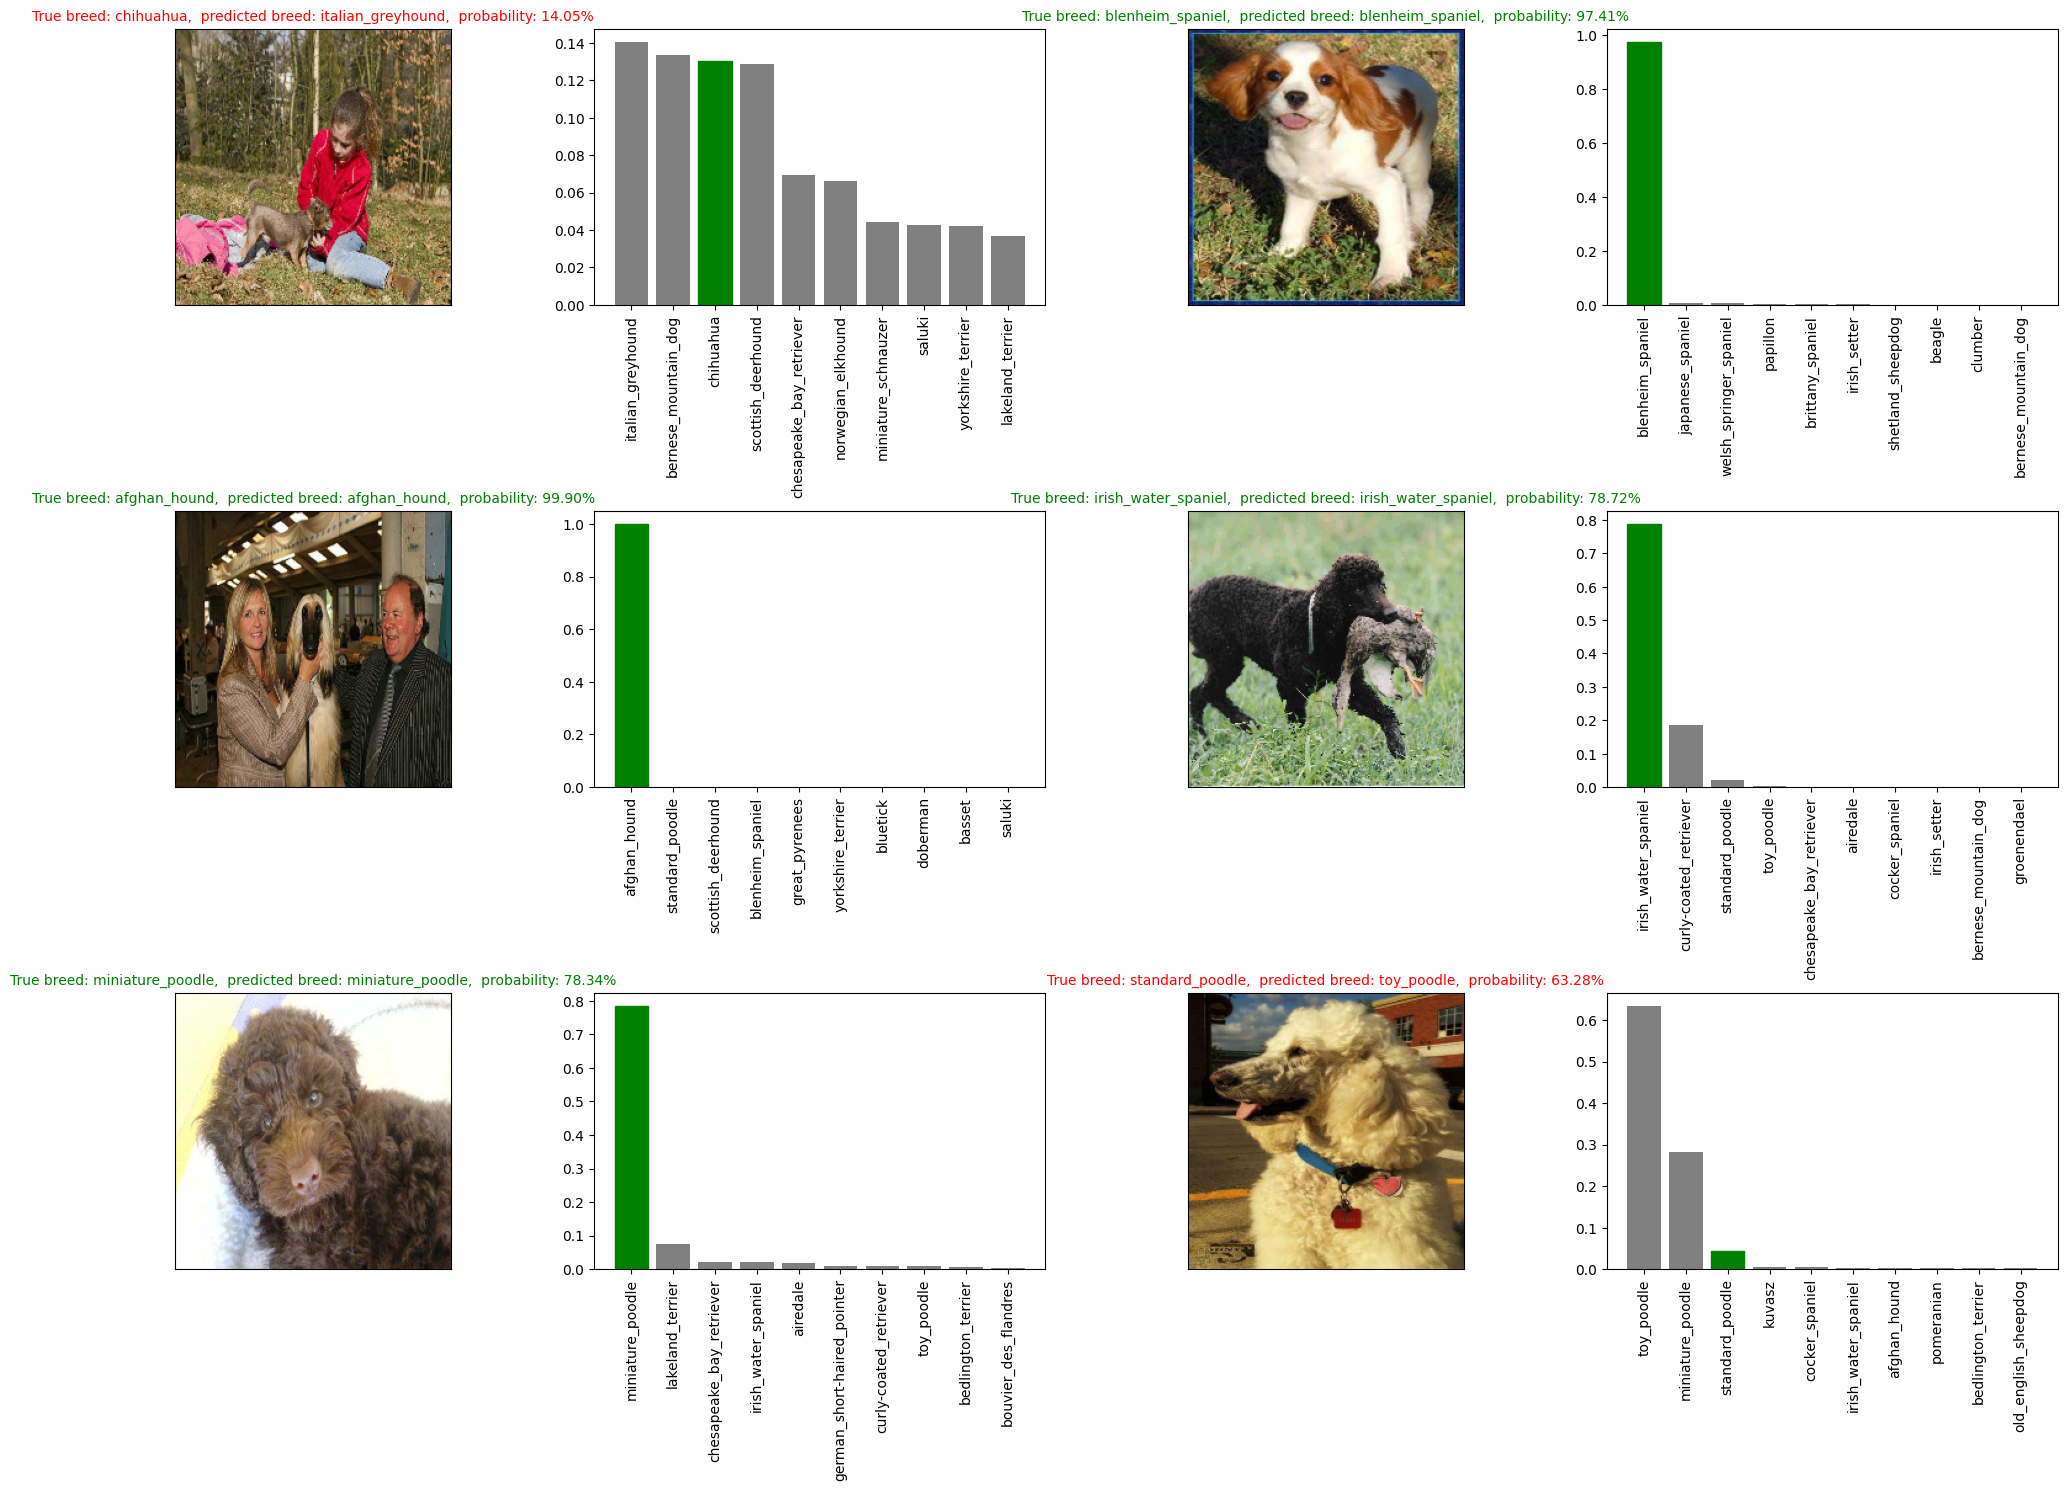

In [109]:
#plotting the images along with the top ten predictions
i_multiplier = 30
num_rows = 3
num_columns = 2
num_images = num_rows*num_columns

plt.figure(figsize=(5*2*num_columns, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows,2*num_columns, 2*i+1)
  plot_prediction(predictions,val_labels,val_images, n=i+i_multiplier)
  plt.subplot(num_rows,2*num_columns, 2*i+2)
  plot_pred_conf(predictions,val_labels,n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)

Create a confusion matrix with this model

## Funcions for aving and loading the model

In [111]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog breed classification project/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [112]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

## Training a model on the full data

In [113]:
len(X), len(y)

(10222, 10222)

In [114]:
# Creating batches of the full data
full_data = create_data_batches(X,y)

Creating training data batches...
batch created


In [115]:
#Instantiating a new model
full_model = create_model()

In [116]:
#Creating the full model callbacks
#tensorboard
full_model_tensorboard = create_tensorboard_callback()
#early stopping
full_early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [117]:
#Number of epochs
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [120]:
#Training the full data model
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_early_stop])

Epoch 1/100
320/320 [==============================] - 50s 138ms/step - loss: 0.0093 - accuracy: 0.9992
Epoch 2/100
320/320 [==============================] - 41s 128ms/step - loss: 0.0114 - accuracy: 0.9984
Epoch 3/100
320/320 [==============================] - 39s 120ms/step - loss: 0.0099 - accuracy: 0.9987
Epoch 4/100
320/320 [==============================] - 43s 135ms/step - loss: 0.0095 - accuracy: 0.9988


In [ ]:
#saving the full model
save_model(full_model,'full_dataset')

In [122]:
#loading the full model
full_model = load_model('/content/drive/MyDrive/Dog breed classification project/models/20240325-23381711409907-full_dataset.h5')

Loading saved model from: /content/drive/MyDrive/Dog breed classification project/models/20240325-23381711409907-full_dataset.h5


In [123]:
full_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_3 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Making predictions on the test set

The test data has to be put into batches because that is what the model trained on.

In [124]:
#Load test image filenames
test_path = '/content/drive/MyDrive/Dog breed classification project/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:5]

['/content/drive/MyDrive/Dog breed classification project/test/e4b7ff61849485992246c0f2ab7e8804.jpg',
 '/content/drive/MyDrive/Dog breed classification project/test/dd7867245d5c104fffb5afe027e41cd1.jpg',
 '/content/drive/MyDrive/Dog breed classification project/test/e4a6892fb0e5c0680edc17138089d93c.jpg',
 '/content/drive/MyDrive/Dog breed classification project/test/e22d81ccf32bd590d8dd66815fd222b7.jpg',
 '/content/drive/MyDrive/Dog breed classification project/test/e2e9e37fa587ad87761da12e105c2b6b.jpg']

In [125]:
#Creating data batches of the test set
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches...
batch created


In [126]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [127]:
test_predictions = full_model.predict(test_data, verbose=1)

324/324 [==============================] - 325s 982ms/step


In [128]:
#save predictions
np.savetxt('/content/drive/MyDrive/Dog breed classification project/test-predictions.csv', test_predictions, delimiter=',')

In [129]:
#load predictions
test_predictions = np.loadtxt('/content/drive/MyDrive/Dog breed classification project/test-predictions.csv', delimiter=',')

## Preparing prediction set for Kaggle

We must create a csv with the id of the image and the predicted probability for each unique breed.

In [130]:
#Setting the columns of the dataframe
df = pd.DataFrame(columns=['id']+list(unique_breeds))

In [131]:
#Append test image id's to the prediction DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
df['id'] = test_ids

In [132]:
#Add the prediction probabilities to each dob breed column
df[list(unique_breeds)] = test_predictions

In [133]:
df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e4b7ff61849485992246c0f2ab7e8804,7.952061e-12,1.863958e-11,3.474532e-14,7.008450e-09,3.001134e-11,1.999153e-10,7.080356e-10,2.569406e-11,1.292697e-13,...,1.453230e-12,3.772813e-10,5.012206e-11,2.514525e-10,1.646330e-12,1.981779e-11,1.789924e-11,6.417291e-11,9.462644e-10,6.322577e-10
1,dd7867245d5c104fffb5afe027e41cd1,8.602202e-11,1.527369e-10,2.482995e-09,1.710386e-07,1.644910e-10,3.966025e-11,1.439368e-09,2.335382e-11,6.929161e-10,...,1.456070e-07,8.428575e-09,2.068616e-07,1.105402e-11,1.187042e-06,1.120690e-10,6.464946e-11,9.508268e-11,3.467022e-08,5.058114e-10
2,e4a6892fb0e5c0680edc17138089d93c,4.588680e-11,2.643296e-12,1.753083e-13,3.306857e-10,4.590370e-11,1.124380e-05,2.354656e-10,2.748453e-11,1.753440e-14,...,5.383430e-10,1.697116e-07,1.536555e-11,2.100854e-12,8.551175e-08,1.120065e-11,1.280496e-09,2.541688e-09,2.210921e-09,7.334247e-10
3,e22d81ccf32bd590d8dd66815fd222b7,1.742050e-06,4.310662e-11,5.174950e-06,1.613487e-13,3.260889e-09,4.656033e-11,8.528435e-14,9.243513e-08,1.848337e-10,...,2.964647e-10,3.672293e-05,7.671191e-10,2.149694e-10,1.998023e-07,2.395349e-11,7.178001e-08,9.609827e-06,1.304278e-11,5.821120e-12
4,e2e9e37fa587ad87761da12e105c2b6b,3.918497e-12,4.117727e-12,1.967321e-12,2.930804e-11,4.567560e-08,3.951376e-13,8.454238e-15,1.953715e-11,8.482355e-12,...,1.060033e-10,2.509079e-15,2.794416e-12,5.147056e-12,4.403630e-11,1.639786e-14,4.188281e-15,2.369380e-11,1.234263e-14,6.234867e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,093429fa3735918cf4501c167b41aad1,4.837545e-12,2.456348e-07,6.941137e-10,5.041802e-06,2.904808e-04,9.586520e-08,3.755538e-08,1.515599e-08,3.910134e-09,...,8.666195e-13,5.794514e-11,4.832770e-07,1.721517e-09,1.517338e-11,1.331481e-06,7.760652e-14,1.213858e-05,5.149562e-11,2.462956e-12
10353,082d768e587edd63163873ecf146de0b,1.559562e-07,2.011416e-09,9.985054e-10,9.941183e-01,8.572233e-06,6.726130e-05,2.783110e-08,2.606992e-11,9.527342e-12,...,1.998499e-08,2.845273e-10,5.153712e-08,2.241027e-08,1.001416e-08,2.981918e-06,8.790829e-10,3.058935e-08,3.100246e-04,1.557080e-08
10354,07f7c5497dd9bd91f62b7d292973393b,5.053425e-18,1.084745e-14,4.529140e-12,6.684467e-18,4.754745e-08,4.149933e-11,3.014593e-14,1.805771e-09,7.468390e-11,...,1.277983e-11,2.941946e-11,1.810735e-12,1.364859e-14,1.387622e-05,3.159455e-13,7.152130e-13,1.138917e-06,2.634337e-16,5.502847e-14
10355,0820dacdc8a994a932d0bae3abd0a15b,1.185733e-05,2.853738e-08,1.029047e-08,2.898843e-09,3.139433e-10,4.166684e-11,8.782492e-08,1.842570e-10,1.303782e-10,...,4.602714e-11,6.353863e-10,2.331832e-13,8.665920e-10,5.377089e-10,2.965491e-10,1.823149e-11,5.515767e-09,2.583347e-07,3.310939e-11


In [135]:
#Saving the prediction
df.to_csv('/content/drive/MyDrive/Dog breed classification project/full_model_predictions.csv', index=False)

## Making predictions on custom images

The steps are the same as those for the test set.
Steps:
* Get the paths
* Create batches with the images
* input the batch to the predict function of the model
* convert the prediction to labels

In [136]:
#creating custom filepaths
custom_path = '/content/drive/MyDrive/Dog breed classification project/Custom images/'
custom_filepaths = [custom_path + fnames for fnames in os.listdir(custom_path)]
custom_filepaths

['/content/drive/MyDrive/Dog breed classification project/Custom images/goldenretriever.jpg']

In [138]:
#inputting the filepath directly
custom_data = create_data_batches(custom_filepaths, test_data = True)

Creating test data batches...
batch created


In [139]:
custom_predictions = full_model.predict(custom_data)

1/1 [==============================] - 1s 1s/step


In [140]:
get_prediction_label(custom_predictions[0])

'golden_retriever'

In [141]:
custom_pred_labels = [get_prediction_label(custom_predictions[i]) for i in range(len(custom_predictions))]

In [142]:
custom_pred_labels

['golden_retriever']

In [143]:
#loop through unbatched data
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

custom_images

[array([[[0.4627101 , 0.2981005 , 0.20400912],
         [0.4627625 , 0.29807425, 0.20400906],
         [0.47057933, 0.2942225 , 0.20404394],
         ...,
         [0.61767316, 0.38259834, 0.28861207],
         [0.46012542, 0.20925009, 0.09955124],
         [0.52134985, 0.27034318, 0.13320228]],
 
        [[0.44695374, 0.32596284, 0.24371494],
         [0.44692737, 0.3259104 , 0.24366249],
         [0.44685692, 0.3219707 , 0.23972282],
         ...,
         [0.53573847, 0.30089858, 0.20693833],
         [0.5601814 , 0.3093067 , 0.19968632],
         [0.48654547, 0.22369573, 0.11011022]],
 
        [[0.4321954 , 0.39694506, 0.33045343],
         [0.42825574, 0.3930054 , 0.32651377],
         [0.42414218, 0.38889182, 0.3224002 ],
         ...,
         [0.4931911 , 0.27380368, 0.18378223],
         [0.49338186, 0.24278578, 0.14484316],
         [0.5020289 , 0.21992138, 0.12592602]],
 
        ...,
 
        [[0.78398186, 0.8035897 , 0.7879034 ],
         [0.7922982 , 0.81182724, 0.79611

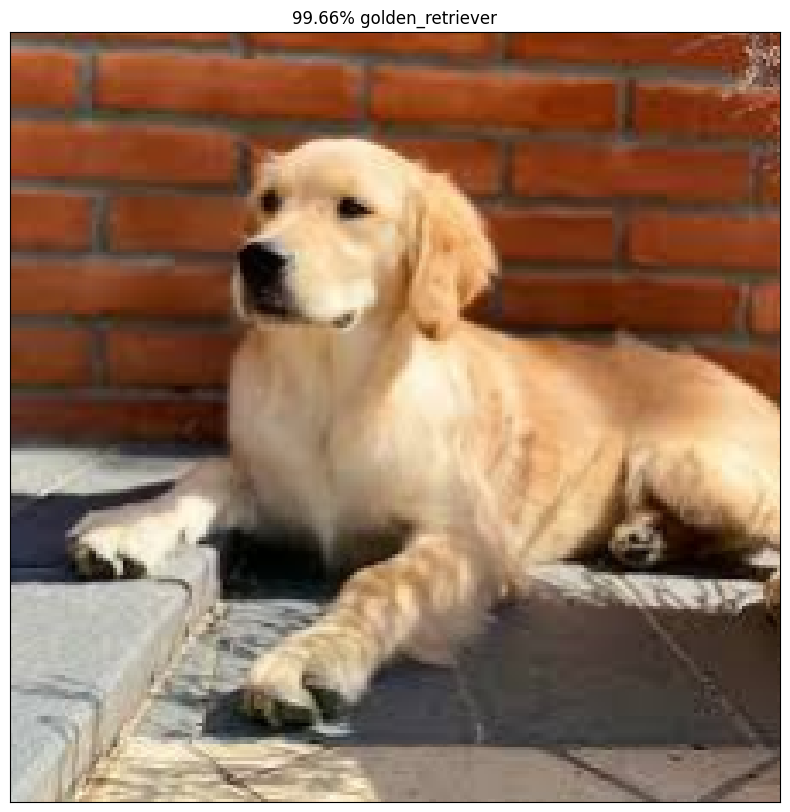

In [145]:
plt.figure(figsize=(10,10))
plt.imshow(custom_images[0])
plt.title(f'{np.max(custom_predictions[0])*100:.2f}% {custom_pred_labels[0]}')
plt.xticks([])
plt.yticks([]);